### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

### First look on data

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

train = pd.read_csv('adult/adult.data', header=None, names=columns, skipinitialspace=True, na_values='?')
test = pd.read_csv('adult/adult.test', header=None, names=columns, skipinitialspace=True, na_values='?', skiprows=1)
full_data = pd.concat([train, test])
full_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
full_data.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27405,18,Private,426836,5th-6th,3,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,40,Mexico,<=50K
2266,41,Private,192602,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K.
6930,45,Federal-gov,90533,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,<=50K.
5050,69,Private,192660,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,20,United-States,<=50K.
10037,22,Private,217363,HS-grad,9,Separated,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Existing NaNs in dataset

In [4]:
print(full_data.isna().sum().sort_values(ascending=False))
print('---------------------------\nTotal number of NaNs: ', full_data.isna().sum().sum(), '\n---------------------------')

occupation        2809
workclass         2799
native-country     857
fnlwgt               0
education            0
education-num        0
age                  0
marital-status       0
relationship         0
sex                  0
race                 0
capital-gain         0
capital-loss         0
hours-per-week       0
income               0
dtype: int64
---------------------------
Total number of NaNs:  6465 
---------------------------


### Existing duplicates in dataset

In [5]:
full_data.duplicated().sum()

np.int64(29)

In [6]:
full_data[full_data.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,NaN,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


### Dropping duplicated rows & NaNs

In [7]:
test['income'].unique()

array(['<=50K.', '>50K.'], dtype=object)

In [8]:
full_data = full_data.drop_duplicates()

In [9]:
full_data = full_data.dropna()

In [10]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45194 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45194 non-null  int64 
 1   workclass       45194 non-null  object
 2   fnlwgt          45194 non-null  int64 
 3   education       45194 non-null  object
 4   education-num   45194 non-null  int64 
 5   marital-status  45194 non-null  object
 6   occupation      45194 non-null  object
 7   relationship    45194 non-null  object
 8   race            45194 non-null  object
 9   sex             45194 non-null  object
 10  capital-gain    45194 non-null  int64 
 11  capital-loss    45194 non-null  int64 
 12  hours-per-week  45194 non-null  int64 
 13  native-country  45194 non-null  object
 14  income          45194 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


### Transforming target

In [11]:
# Transform the target variable into 1s and 0s

full_data['income'] = full_data['income'].map({
    '>50K': 1,
    '>50K.': 1,
    '<=50K': 0,
    '<=50K.': 0})
full_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### EDA

In [12]:
numerical_columns = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
numerical_df = full_data[numerical_columns]
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45194.0,38.551755,13.215806,17.0,28.00,37.0,47.0,90.0
fnlwgt,45194.0,189737.853056,105640.654414,13492.0,117392.25,178312.0,237903.0,1490400.0
capital-gain,45194.0,1102.112736,7508.705003,0.0,0.00,0.0,0.0,99999.0
capital-loss,45194.0,88.650308,405.075515,0.0,0.00,0.0,0.0,4356.0
hours-per-week,45194.0,40.941209,12.006449,1.0,40.00,40.0,45.0,99.0
income,45194.0,0.247953,0.431829,0.0,0.00,0.0,0.0,1.0


In [13]:
categorical_columns = [ 'workclass', 'education', 'education-num', 'marital-status', 
                        'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
index = ['count', 'unique', 'top', 'top-freq', 'least-freq', 'top-freq-%', 'min-occurrence', 'NaN-count']

def summarize_column(column):
    value_counts = full_data[column].value_counts()
    most_freq_percentage = (value_counts.max() / full_data[column].count()) * 100

    return [
        full_data[column].count(),              # Non-null count
        full_data[column].nunique(),            # Number of unique values
        value_counts.idxmax(),              # Most frequent value (label)
        value_counts.max(),                 # Frequency of the most frequent value
        value_counts.min(),                 # Frequency of the least frequent value
        f"{most_freq_percentage:.2f}%",     # Percentage of the most frequent value
        value_counts.idxmin(),              # Least frequent value (label)
        full_data[column].isna().sum()          # Null count
    ]

categorical_dict = {col: summarize_column(col) for col in categorical_columns}
categorical_df = pd.DataFrame(categorical_dict, index=index)
categorical_df.T

,count,unique,top,top-freq,least-freq,top-freq-%,min-occurrence,NaN-count
workclass,45194,7,Private,33281,21,73.64%,Without-pay,0
education,45194,16,HS-grad,14777,71,32.70%,Preschool,0
education-num,45194,16,9,14777,71,32.70%,1,0
marital-status,45194,7,Married-civ-spouse,21048,32,46.57%,Married-AF-spouse,0
occupation,45194,14,Craft-repair,6015,14,13.31%,Armed-Forces,0
relationship,45194,6,Husband,18659,1349,41.29%,Other-relative,0
race,45194,5,White,38877,353,86.02%,Other,0
sex,45194,2,Male,30509,14685,67.51%,Female,0
native-country,45194,41,United-States,41270,1,91.32%,Holand-Netherlands,0
income,45194,2,0,33988,11206,75.20%,1,0


### 2399 rows contains all the NaNs

In [14]:
full_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [15]:
full_data[(full_data['workclass'].isna()) | (full_data['occupation'].isna()) | (full_data['native-country'].isna())][['workclass', 'occupation', 'native-country']].shape

(0, 3)

In [16]:
# full_data[full_data['workclass'].isna()][['workclass', 'occupation', 'native-country']]
# full_data[full_data['occupation'].isna()][['workclass', 'occupation', 'native-country']]
# full_data[full_data['native-country'].isna()][['workclass', 'occupation', 'native-country']]

### Visual Analysis

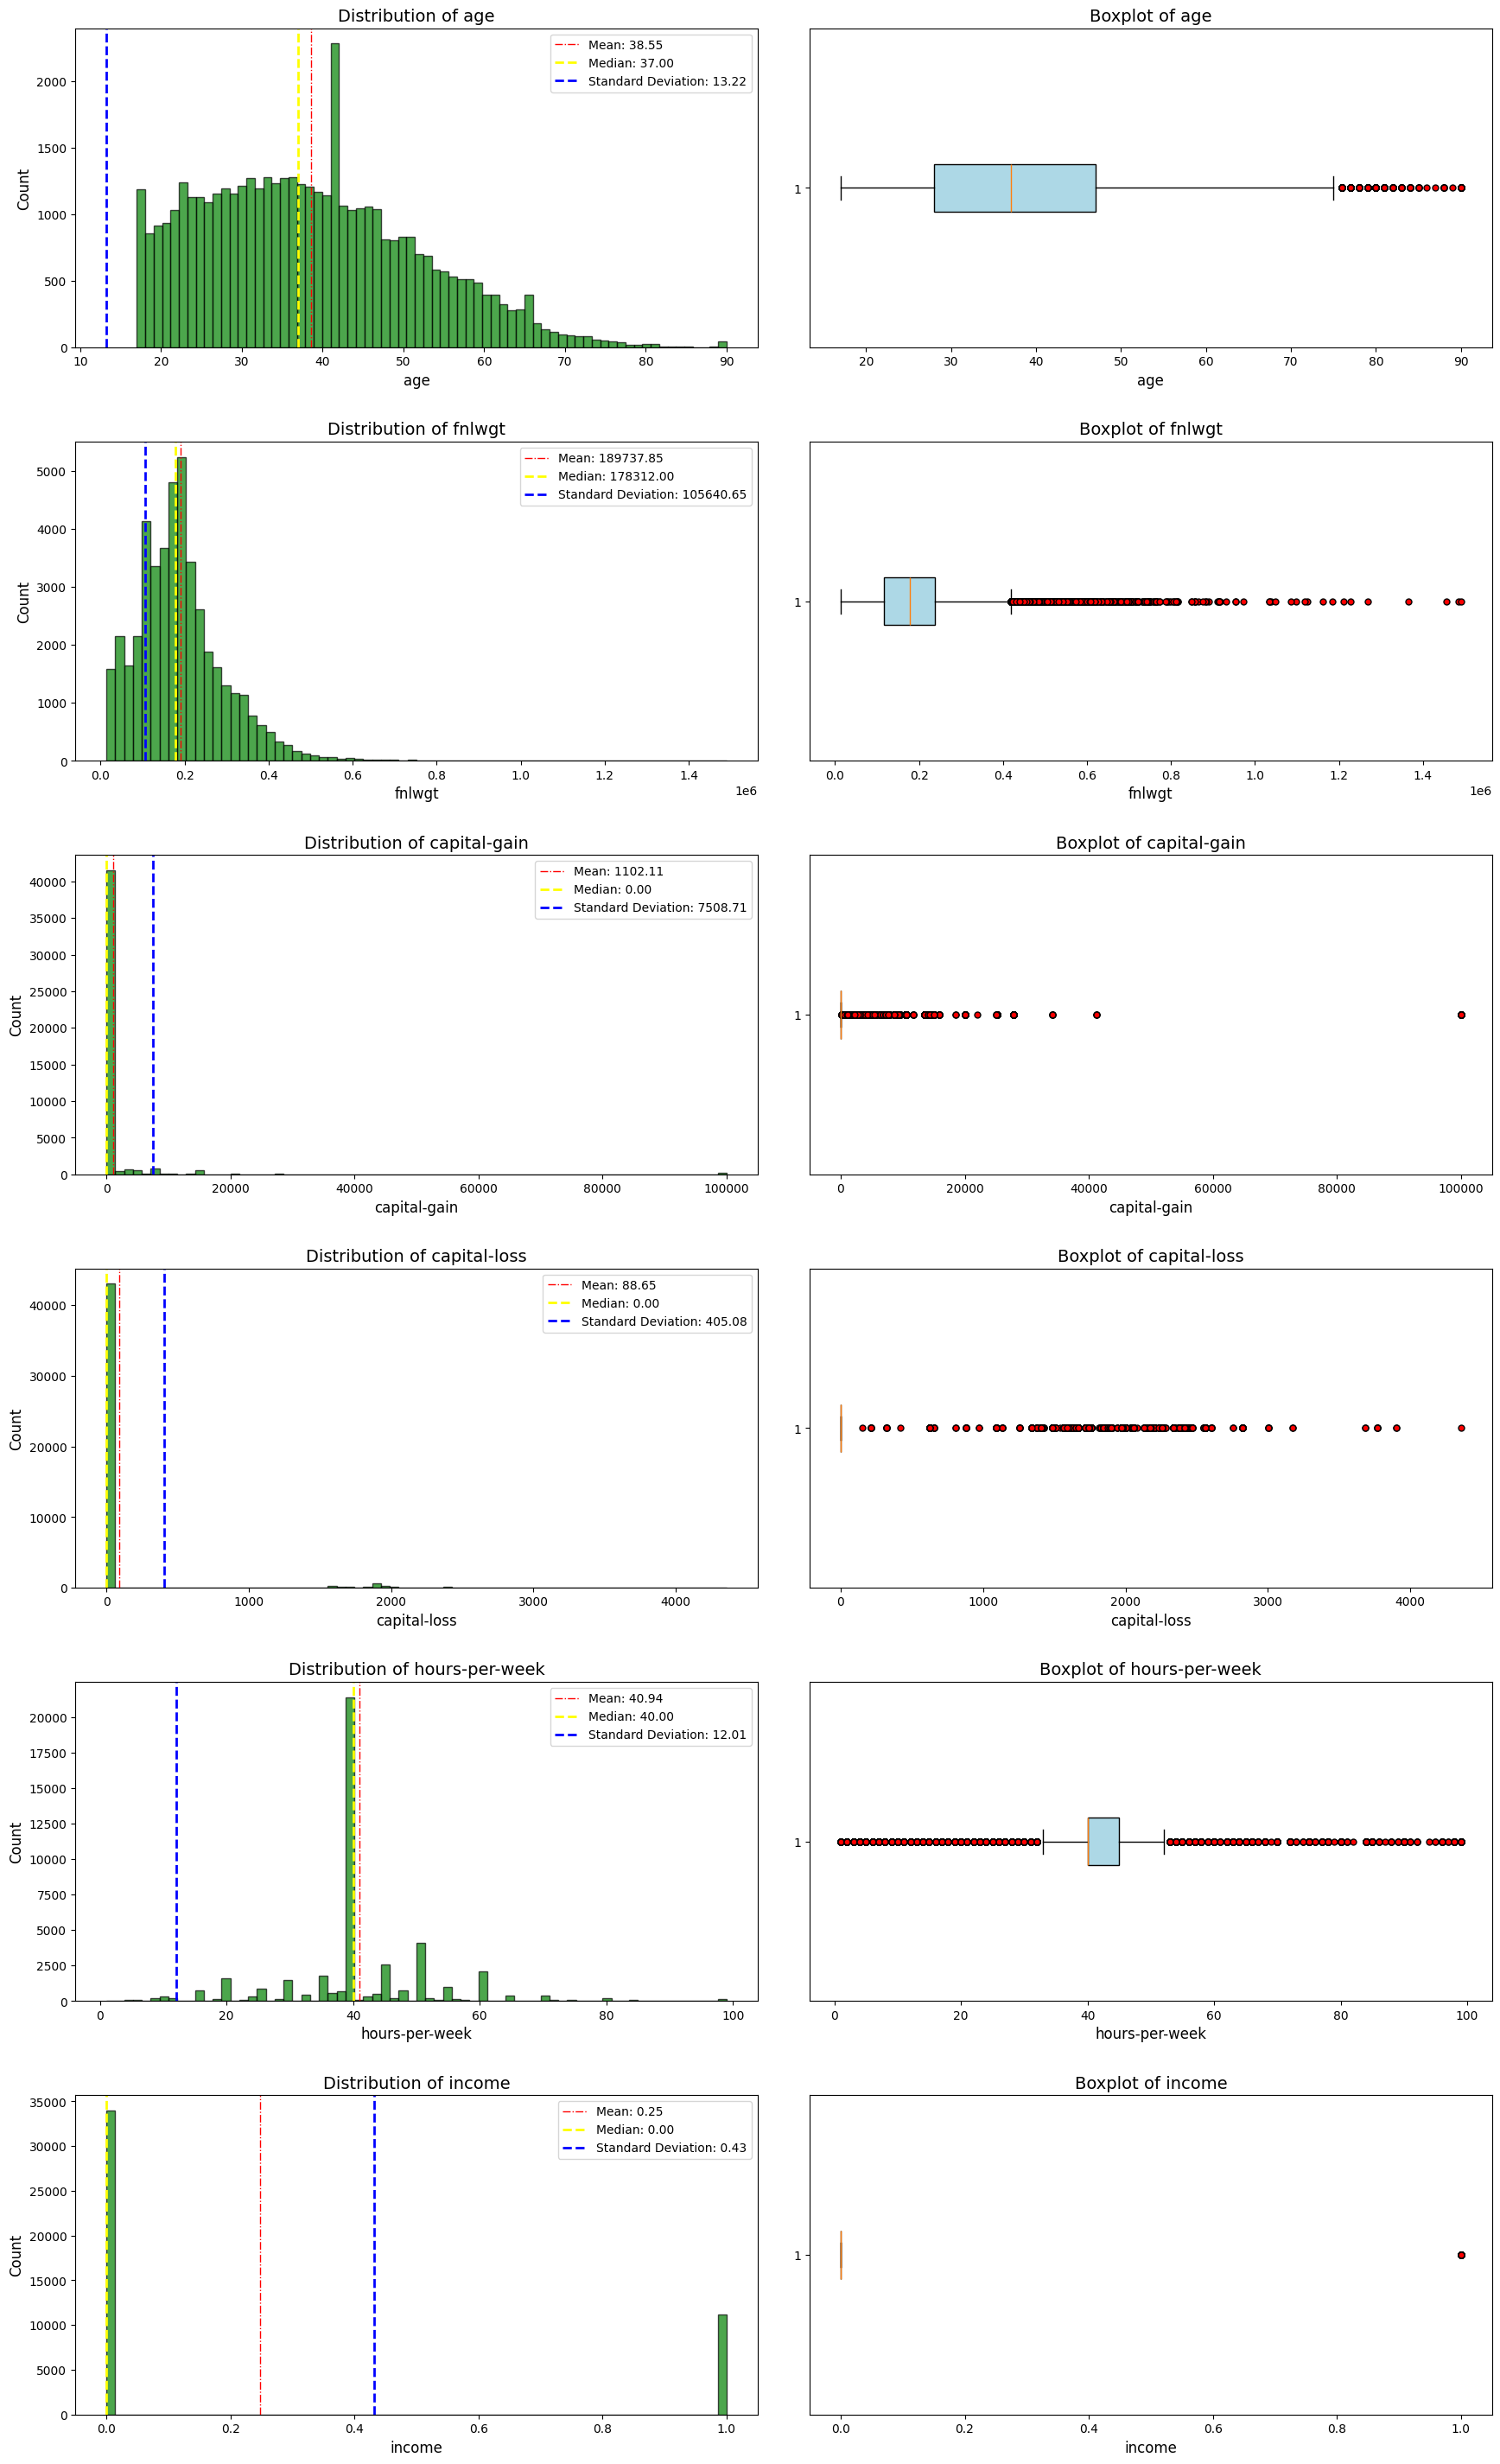

In [17]:
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(18, 5 * len(numerical_columns)))
color = 'green'

for i, feature in enumerate(numerical_columns):
    data = full_data[feature].dropna()  # Handle NaN values once
    mean = data.mean()
    median = data.median()
    std = data.std()
    
    # Histogram with Mean and Median Lines
    axes[i, 0].hist(data, color=color, bins=70, edgecolor='black', alpha=0.7)
    axes[i, 0].axvline(mean, linestyle='-.', color='red', linewidth=1, label=f'Mean: {mean:.2f}')
    axes[i, 0].axvline(median, linestyle='--', color='yellow', linewidth=2, label=f'Median: {median:.2f}')
    axes[i, 0].axvline(std, linestyle='--', color='blue', linewidth=2, label=f'Standard Deviation: {std:.2f}')
    axes[i, 0].legend(loc='upper right', fontsize=10)
    axes[i, 0].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i, 0].set_xlabel(feature, fontsize=12)
    axes[i, 0].set_ylabel('Count', fontsize=12)

    # Boxplot with Outlier Markers
    axes[i, 1].boxplot(data, vert=False, patch_artist=True,
                       boxprops=dict(facecolor='lightblue', color='black'),
                       flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))
    axes[i, 1].set_title(f'Boxplot of {feature}', fontsize=14)
    axes[i, 1].set_xlabel(feature, fontsize=12)

# Adjust layout and add spacing
plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.95)  # Ensure no overlap with top title if added
plt.show()


In [18]:
# full_data[full_data['hours-per-week'] > 75][['hours-per-week', 'income']]
# full_data[full_data['capital-gain'] >= 60000][['capital-gain', 'income']]

In [19]:
index = full_data[(full_data['hours-per-week'] > 75) | (full_data['capital-gain'] >= 60000)].index

# Drop the identified rows
full_data = full_data.drop(index=index, axis=0)

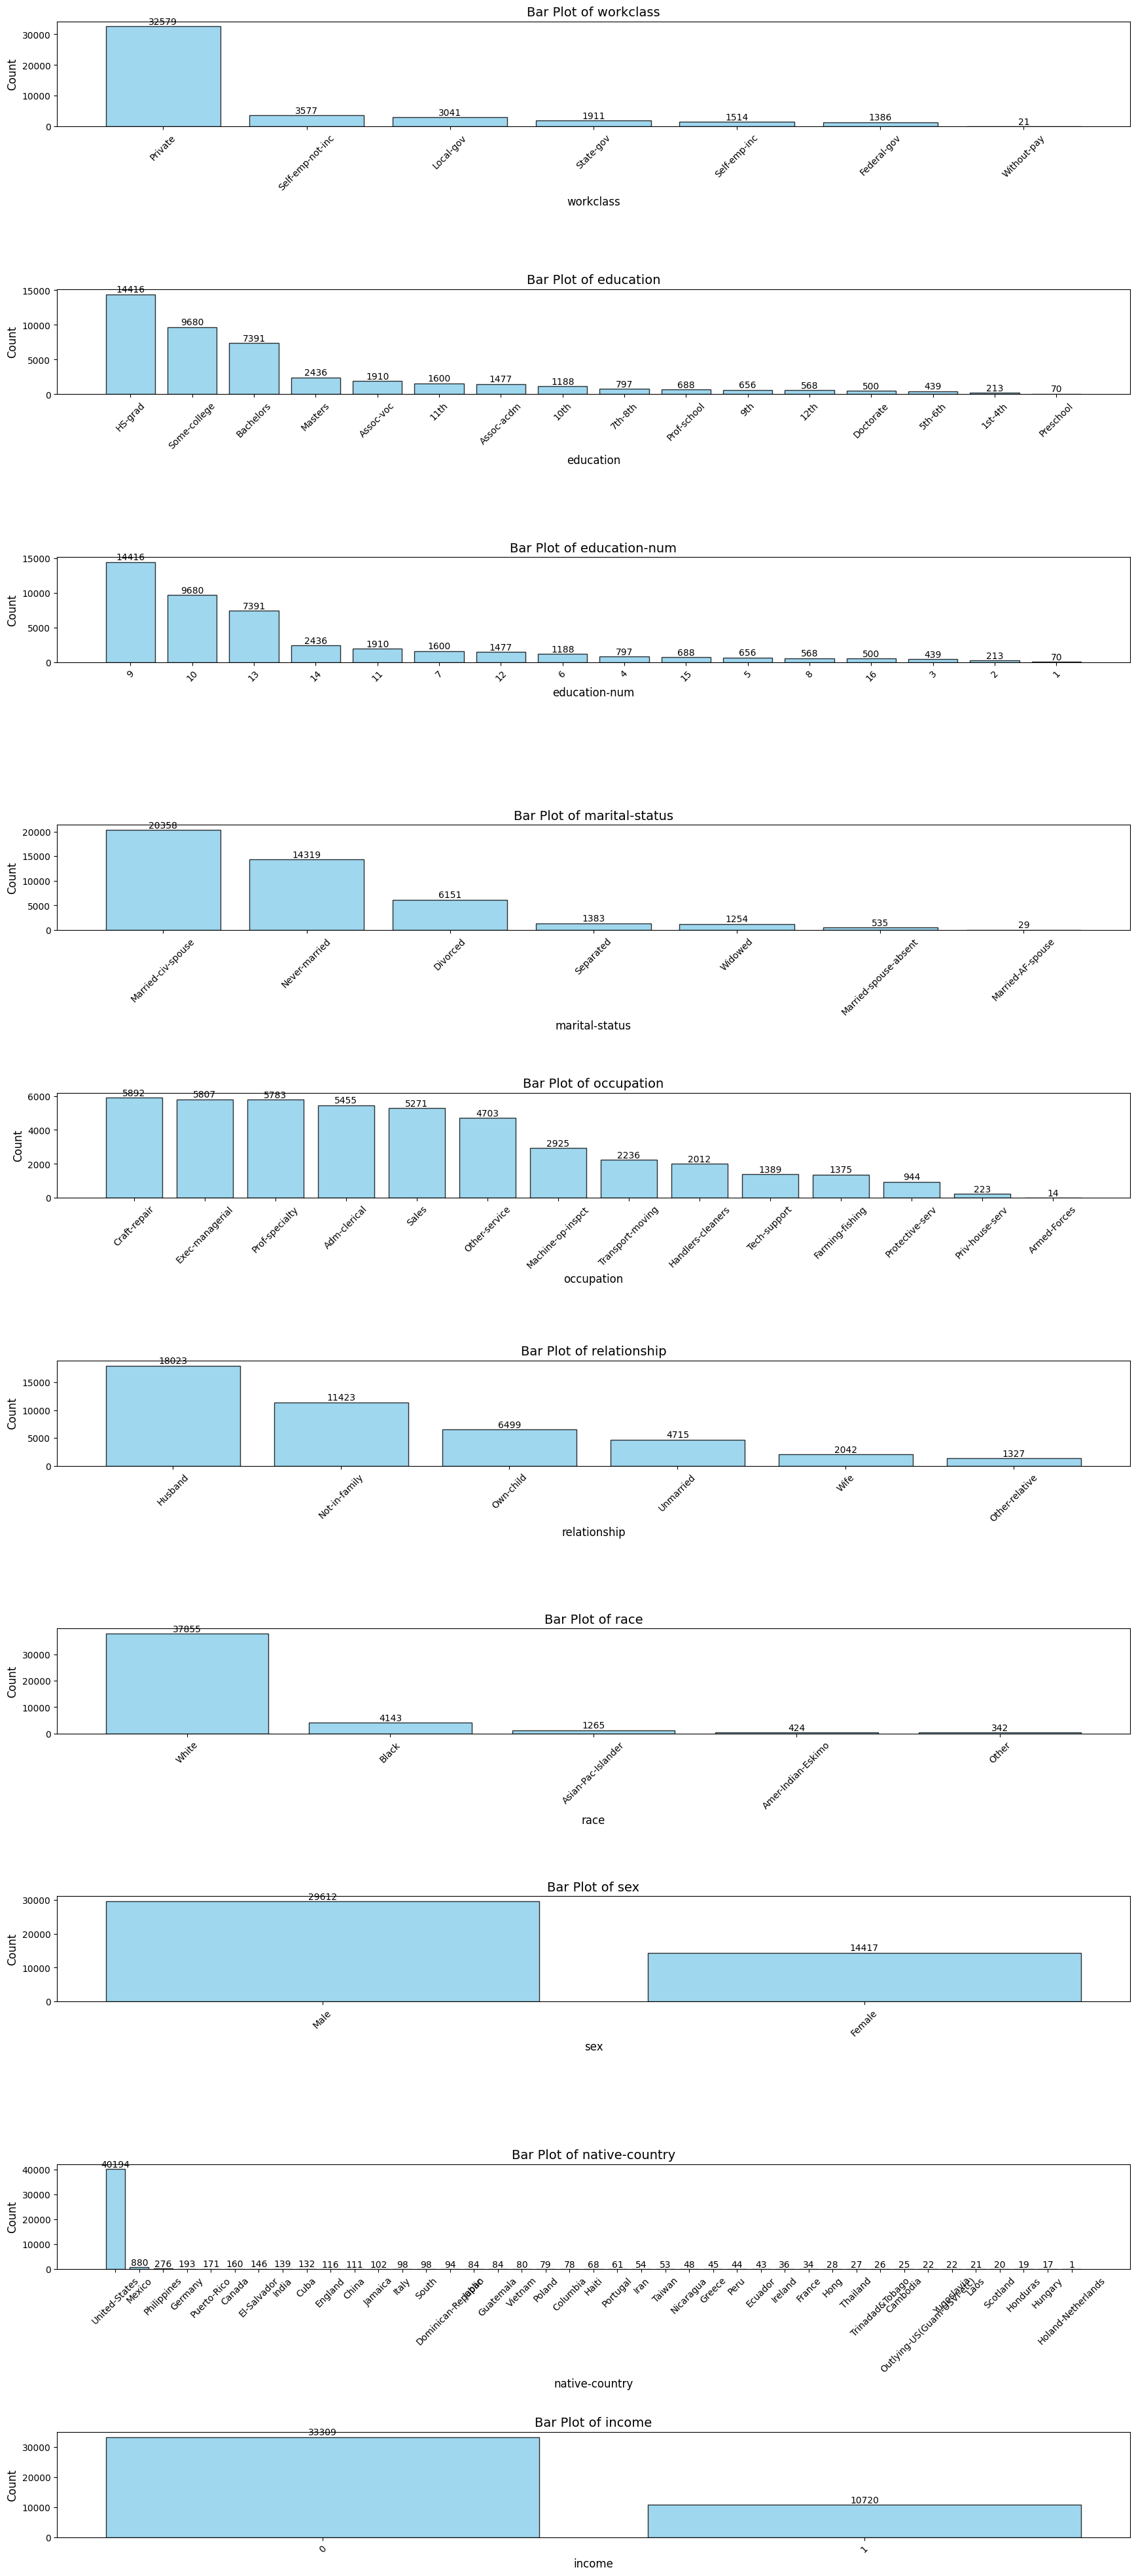

In [20]:
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(18, 4 * len(categorical_columns)))
for i, feature in enumerate(categorical_columns):
    data = full_data[feature].dropna()
    
    value_counts = data.value_counts(ascending=False)
    axes[i].bar(x=value_counts.index.astype(str), height=value_counts.values, color='skyblue', edgecolor='black', alpha=0.8)
    for j, value in enumerate(value_counts.values):
        axes[i].text(j, value + 0.5, f'{value}', ha='center', va='bottom', fontsize=10, color='black')

    axes[i].set_title(f'Bar Plot of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(pad=3.0)
plt.show()

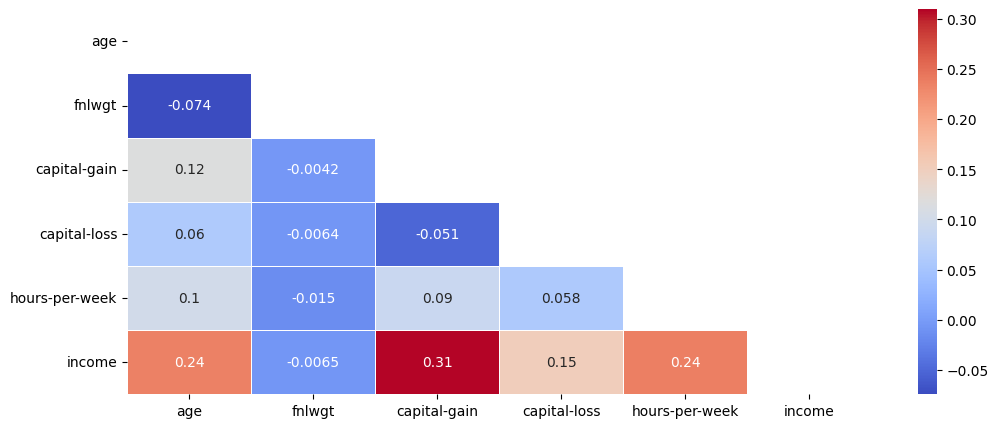

In [21]:
plt.figure(figsize=(12, 5))
corr = full_data[numerical_columns].corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask, linewidths=0.5)
plt.show()

* Since the correlation heatmap showed very low correlation between the features therefore, the data doesn't suffer from the multicolinearity problem.
* on the other hand, since there is no considerable (high enough) correlations between the features and the target, linear models(linear reg, SVMs, etc etc) are not suitable for the nature of this dataset
* Maybe tree-based models will do better because they can capture non-linear relationships

### Feature Engineering and preparation

#### Dropping redundant features

In [22]:
# remove redundant feature
full_data = full_data.drop(['education'], axis=1)
full_data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Clustering countries
* We are clustering countries in native-countries to group countries, to reduce the dimensionality space before we perform one-hot encoding.
* First we create country_grouped table of averages of some features.
* Then we normalize those averages to be on a similar scale.
* Then we try to find best K value using The Elbow method.
* Then we perform the clustering with the best found K value.
* Finally, we map the clusters to the corresponding country and drop redundant features.

In [23]:
# Group data by native-country and aggregate relevant numerical features
country_grouped = full_data.groupby(by='native-country').agg({
    'age': 'mean',
    'fnlwgt': 'mean',
    'education-num': 'mean',
    'capital-gain': 'mean',
    'capital-loss': 'mean',
    'hours-per-week': 'mean',
    'income': 'mean'  # Proportion of high-income individuals
}).reset_index()
country_grouped.head()

,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,Cambodia,38.320000,203918.000000,9.400000,781.160000,154.120000,42.280000,0.360000
1,Canada,42.993750,182280.475000,10.768750,720.356250,149.193750,41.512500,0.362500
2,China,41.351351,175846.054054,11.396396,646.351351,187.567568,39.099099,0.306306
3,Columbia,39.076923,218014.435897,9.230769,136.615385,71.102564,39.102564,0.038462
4,Cuba,46.000000,240655.257576,9.530303,491.931818,65.568182,40.227273,0.257576


In [24]:
features_to_scale = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']

# Apply StandardScaler to normalize the features
scaler = StandardScaler()
country_grouped[features_to_scale] = scaler.fit_transform(country_grouped[features_to_scale])

country_grouped.head()

,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,Cambodia,-0.159466,0.185746,-0.237046,0.982380,0.058338,0.998969,1.140297
1,Canada,1.050819,-0.313255,0.603810,0.799430,0.043538,0.624020,1.159316
2,China,0.625514,-0.461645,0.989389,0.576760,0.158831,-0.555005,0.731802
3,Columbia,0.036542,0.510835,-0.341009,-0.956964,-0.191086,-0.553312,-1.305924
4,Cuba,1.829298,1.032974,-0.156998,0.112133,-0.207714,-0.003855,0.361067


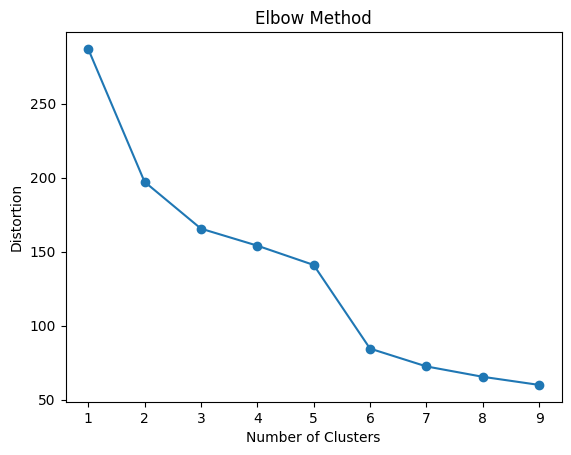

<Figure size 640x480 with 0 Axes>

In [25]:
# Find optimal number of clusters using the Elbow Method
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(country_grouped[features_to_scale])
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()
plt.tight_layout()

In [26]:
# Apply K-means clustering with 7 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
country_grouped['Cluster'] = kmeans.fit_predict(country_grouped[features_to_scale])

# Display the clusters
country_grouped[['native-country', 'Cluster']].head()

,native-country,Cluster
0,Cambodia,1
1,Canada,4
2,China,1
3,Columbia,3
4,Cuba,4


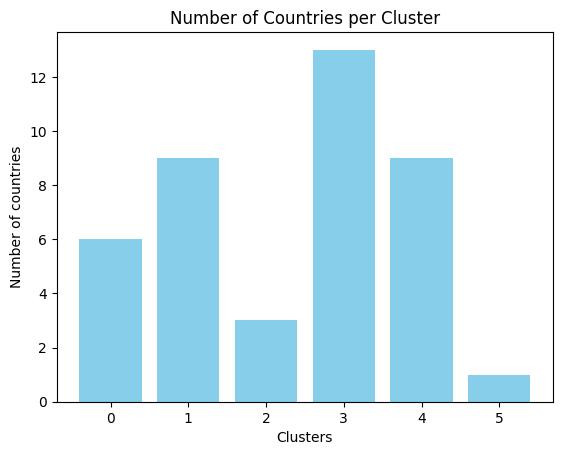

<Figure size 640x480 with 0 Axes>

In [27]:
plt.bar(x=country_grouped['Cluster'].value_counts().index, height=country_grouped['Cluster'].value_counts().values, color='skyblue')
plt.title('Number of Countries per Cluster')
plt.xlabel('Clusters')
plt.ylabel('Number of countries')
plt.show()
plt.tight_layout()

In [28]:
# Create a mapping from native-country to cluster
country_cluster_map = country_grouped.set_index('native-country')['Cluster'].to_dict()

# Add the cluster information to the original dataset
full_data['country-cluster'] = full_data['native-country'].map(country_cluster_map)

# Check the result
full_data[['native-country', 'country-cluster']].head()

,native-country,country-cluster
0,United-States,1
1,United-States,1
2,United-States,1
3,United-States,1
4,Cuba,4


In [29]:
full_data = full_data.drop(['native-country'], axis=1)
full_data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,country-cluster
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,1
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,1
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,1
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,1
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,4


### One-Hot Encoding

In [30]:
full_data = pd.get_dummies(full_data, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex'], drop_first=True)
full_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,country-cluster,workclass_Local-gov,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,77516,13,2174,0,40,0,1,False,False,...,True,False,False,False,False,False,False,False,True,True
1,50,83311,13,0,0,13,0,1,False,False,...,False,False,False,False,False,False,False,False,True,True
2,38,215646,9,0,0,40,0,1,False,True,...,True,False,False,False,False,False,False,False,True,True
3,53,234721,7,0,0,40,0,1,False,True,...,False,False,False,False,False,False,True,False,False,True
4,28,338409,13,0,0,40,0,4,False,True,...,False,False,False,False,True,False,True,False,False,False


### Target Imbalance

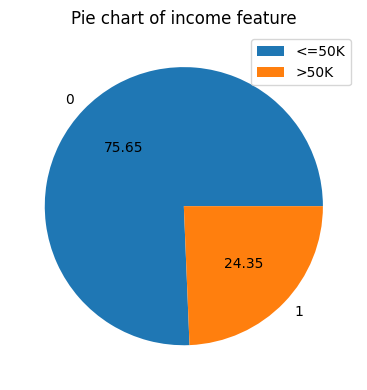

In [31]:
plt.figure(figsize=(6, 4))
plt.pie(x=full_data['income'].value_counts().values, labels=full_data['income'].value_counts().index, autopct='%.2f')
plt.title('Pie chart of income feature')
plt.tight_layout()
plt.legend(['<=50K', '>50K'])
plt.show()

### SMOTE will be used to balance the target

In [32]:
X = full_data.drop('income', axis=1)
y = full_data['income']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Original dataset shape: {X.shape}, {y.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}, {y_resampled.shape}")

Original dataset shape: (44029, 42), (44029,)
Resampled dataset shape: (66618, 42), (66618,)


In [33]:
# Combine the features and target back into one DataFrame
full_data = pd.concat([X_resampled, y_resampled], axis=1)


print(f"Resampled DataFrame shape: {full_data.shape}")

full_data.head()

Resampled DataFrame shape: (66618, 43)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,country-cluster,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income
0,39,77516,13,2174,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,True,0
1,50,83311,13,0,0,13,1,False,False,False,...,False,False,False,False,False,False,False,True,True,0
2,38,215646,9,0,0,40,1,False,True,False,...,False,False,False,False,False,False,False,True,True,0
3,53,234721,7,0,0,40,1,False,True,False,...,False,False,False,False,False,True,False,False,True,0
4,28,338409,13,0,0,40,4,False,True,False,...,False,False,False,True,False,True,False,False,False,0


In [34]:
print(full_data['income'].value_counts())


income
0    33309
1    33309
Name: count, dtype: int64


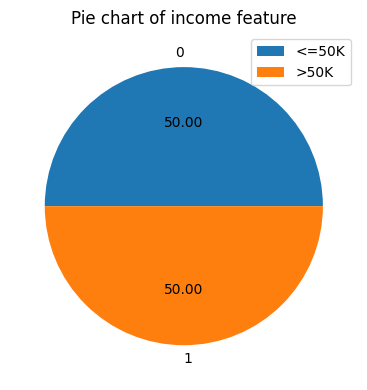

In [35]:
plt.figure(figsize=(6, 4))
plt.pie(x=full_data['income'].value_counts().values, labels=full_data['income'].value_counts().index, autopct='%.2f')
plt.title('Pie chart of income feature')
plt.tight_layout()
plt.legend(['<=50K', '>50K'])
plt.show()

### Splitting data

In [36]:
train, test = train_test_split(full_data, random_state=42, test_size=0.3, shuffle=True)
print('Train shape: ', train.shape)
print('Test shape: ', test.shape)

Train shape:  (46632, 43)
Test shape:  (19986, 43)


### Models Preparation & Implementation

In [37]:
X_train = train.drop(['income'], axis=1)
y_train = train['income']

X_test = test.drop(['income'], axis=1)
y_test = test['income']

#### Random Forest

In [38]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [39]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
[[9015  961]
 [1120 8890]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      9976
           1       0.90      0.89      0.90     10010

    accuracy                           0.90     19986
   macro avg       0.90      0.90      0.90     19986
weighted avg       0.90      0.90      0.90     19986


Accuracy Score: 0.8958771139797859


#### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_knn = knn_model.predict(X_test)

In [41]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_knn))

Confusion Matrix:
[[6571 3405]
 [2352 7658]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      9976
           1       0.69      0.77      0.73     10010

    accuracy                           0.71     19986
   macro avg       0.71      0.71      0.71     19986
weighted avg       0.71      0.71      0.71     19986


Accuracy Score: 0.7119483638546983


#### MLP

In [42]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_mlp = mlp_model.predict(X_test)

In [43]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_mlp))

Confusion Matrix:
[[8307 1669]
 [1500 8510]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      9976
           1       0.84      0.85      0.84     10010

    accuracy                           0.84     19986
   macro avg       0.84      0.84      0.84     19986
weighted avg       0.84      0.84      0.84     19986


Accuracy Score: 0.8414390073051136


#### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_dt = dt_model.predict(X_test)

In [45]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_dt))

Confusion Matrix:
[[8543 1433]
 [1361 8649]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      9976
           1       0.86      0.86      0.86     10010

    accuracy                           0.86     19986
   macro avg       0.86      0.86      0.86     19986
weighted avg       0.86      0.86      0.86     19986


Accuracy Score: 0.8602021414990494


#### Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_nb = nb_model.predict(X_test)

In [47]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
[[9330  646]
 [7031 2979]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.94      0.71      9976
           1       0.82      0.30      0.44     10010

    accuracy                           0.62     19986
   macro avg       0.70      0.62      0.57     19986
weighted avg       0.70      0.62      0.57     19986


Accuracy Score: 0.6158811167817472


### Models Evaluation

In [48]:
model_results = []

models = [
    ("Decision Tree", dt_model),
    ("Random Forest", rf_model),
    # ("SVM", svm_model),
    ("KNN", knn_model),
    ("MLP", mlp_model),
    ("Naive Bayes", nb_model)
]

# Evaluate each model and store the scores
for name, model in models:
    y_pred = model.predict(X_test)
    
    # Collect metrics for each model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the results to the list
    model_results.append([name, accuracy, precision, recall, f1])
    
# Create a DataFrame from the results
scores_df = pd.DataFrame(model_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
scores_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.860202,0.857866,0.864036,0.860940
1,Random Forest,0.895877,0.902446,0.888112,0.895222
2,KNN,0.711948,0.692217,0.765035,0.726807
3,MLP,0.841439,0.836035,0.850150,0.843033
4,Naive Bayes,0.615881,0.821793,0.297602,0.436964


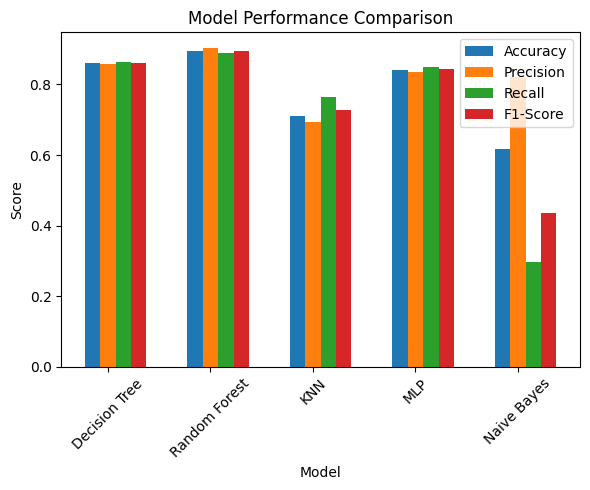

In [49]:
plt.figure(figsize=(6, 5))
plt.bar(x=np.arange(len(scores_df['Model']))- 0.15, height=scores_df['Accuracy'], width=0.15, label='Accuracy')
plt.bar(x=np.arange(len(scores_df['Model'])), height=scores_df['Precision'], width=0.15, label='Precision')
plt.bar(x=np.arange(len(scores_df['Model']))+ 0.15, height=scores_df['Recall'], width=0.15, label='Recall')
plt.bar(x=np.arange(len(scores_df['Model']))+ 0.30, height=scores_df['F1-Score'], width=0.15, label='F1-Score')
plt.xticks(np.arange(len(scores_df['Model'])), scores_df['Model'].unique(), rotation=45)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()